Will Russell     V00788739
- Implemented the ideas discussed in jupyter notebook/pdf and python code

Taylor Nelson
- Assisted in method design

Ayush Rohatgi
- Provided ideas for writeup

#### Notes on Running the Notebook

Here we have strived to make the application as interactive as possible without overloading the reader with code. Jupyter Notebook seemed to be perfect for this, although using it does come with some caveats that should be known to the reader.

- This application was written using python 3.4, it may not work with older versions of python
- It assumes that the appropriate modules have been installed either using the accompanying anaconda environment file(cmsc409_p1_env.yaml) or independently. To create an anaconda environment, check out the accompanying <a href="readme.md">readme file</a>. 
- The data in data.txt and that used for the code will be randomly generated each time, including the associated data file, with the number of values generated tied to the sample_size put in below.
- The code used for plotting the lines and establishing the coefficients is hardcoded can be found at the head of the project_code/data.py file
- The majority of the code for the application resides in the project_code module/directory.
    

In [1]:
# Here you can modify the sample_size used to generate the
# students and the attached plots
sample_size = 2000

### Randomly generate the data based around a standard deviation and mean

Number of male students : 2000
Number of female students : 2000
-----------
Sample Data
-----------

Male id  |   height  | weight 
	0|	5.5|	187.66
	1|	5.49|	196.28
	2|	5.6|	232.19
	3|	5.85|	154.06
	4|	5.51|	186.3
	5|	5.59|	185.37
	6|	6.24|	169.16
	7|	6.29|	179.21
	8|	5.67|	175.1
	9|	5.73|	157.98

Female id |  height  | weight 
	0|	5.3|	136.14
	1|	5.28|	146.53
	2|	5.64|	143.44
	3|	4.86|	145.73
	4|	5.1|	147.26
	5|	5.31|	142.45
	6|	5.05|	130.42
	7|	4.91|	171.5
	8|	5.76|	150.53
	9|	4.67|	151.84


<IPython.core.display.Javascript object>


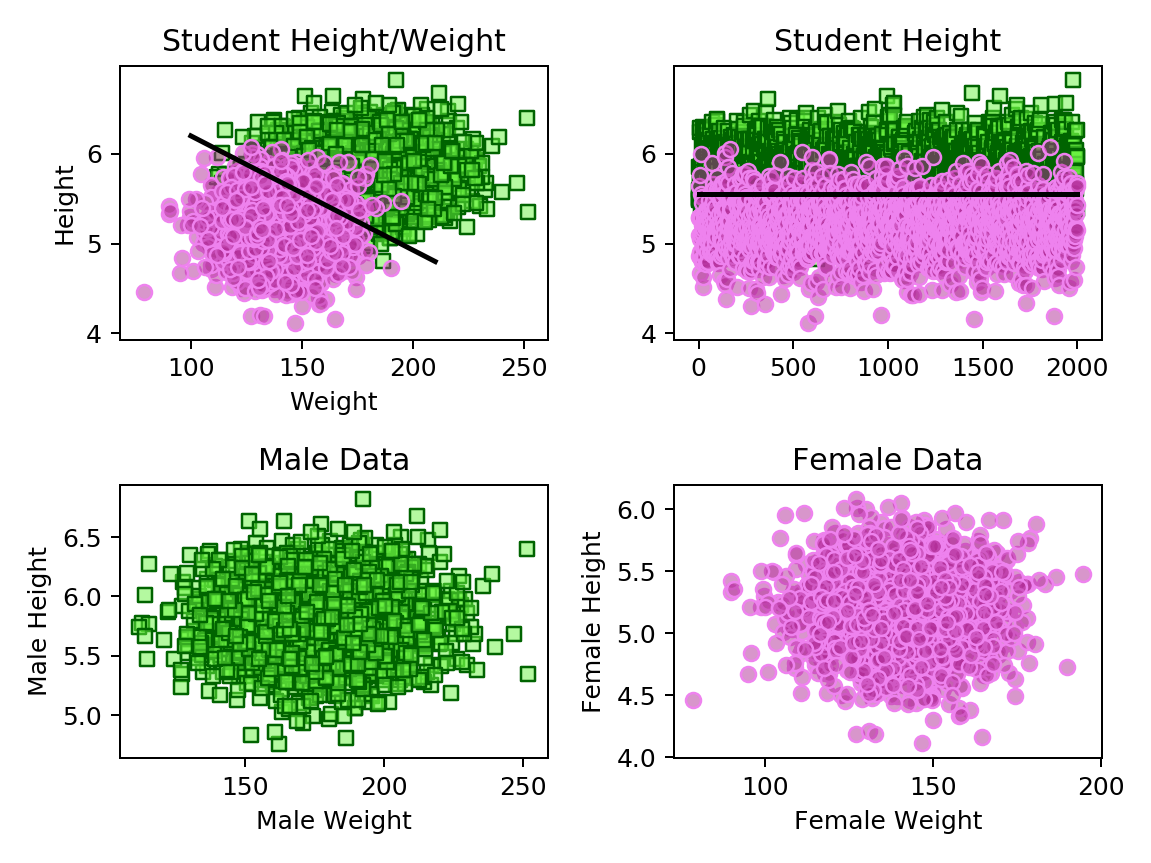

In [2]:
from project_code.data import *
from project_code.graphlib import *
from project_code.fileWorker import *

from IPython.display import Latex
%matplotlib notebook
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('png', 'pdf')

# Randomly generates the data
male_students, female_students = generate_random_student_data(sample_size)
# Writes the data to a file, data.txt
write_data_to_file(male_students, female_students, "./data.txt")
x1,x2 = 210,100
y1,y2,y3 = 4.8,6.2,5.55
write_coefficients_to_file(x1,x2,y3,y3,"sep_line_a.txt")
write_coefficients_to_file(x1,x2,y1,y2,"sep_line_b.txt")
# Plots the data using Matplotlib below
plot_overall_data(male_students, female_students)


### Plot the data along with separation lines for each scenario

<IPython.core.display.Javascript object>


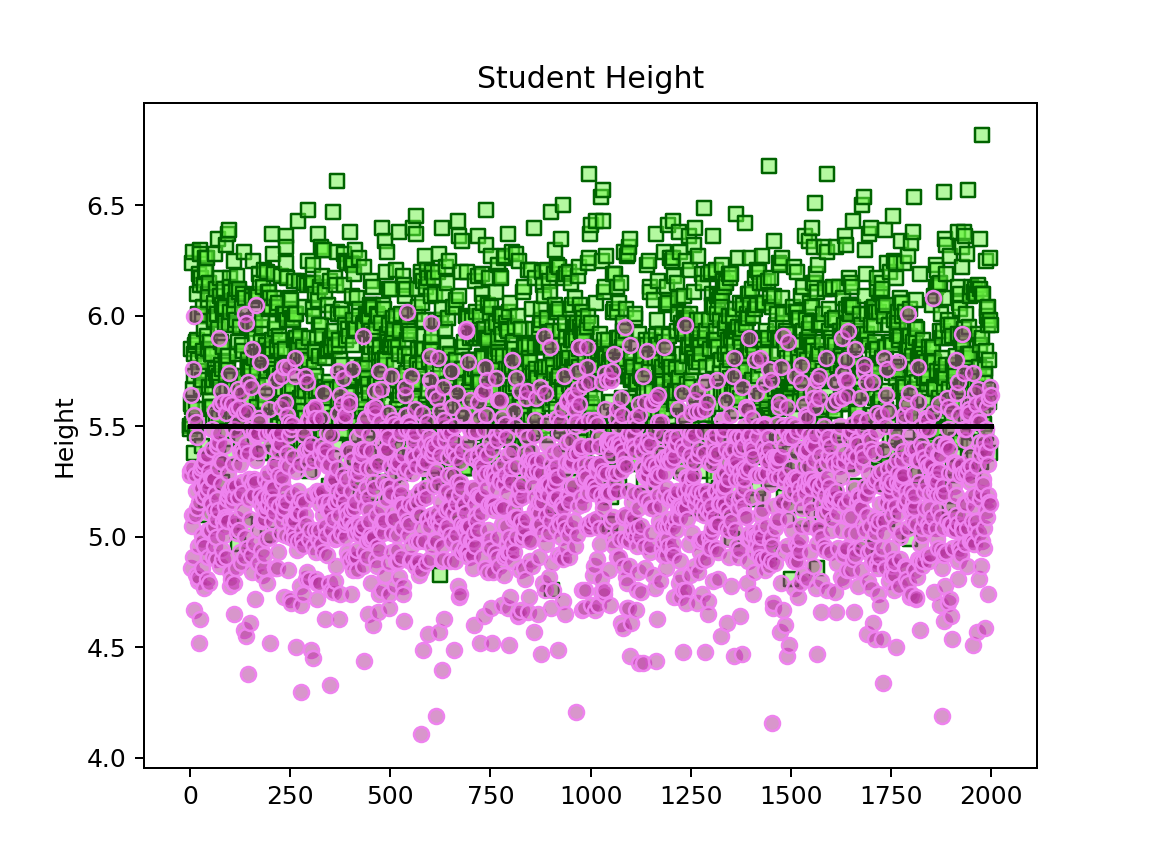

In [3]:
plot_height_data(male_students, female_students, 5.5)

<IPython.core.display.Javascript object>


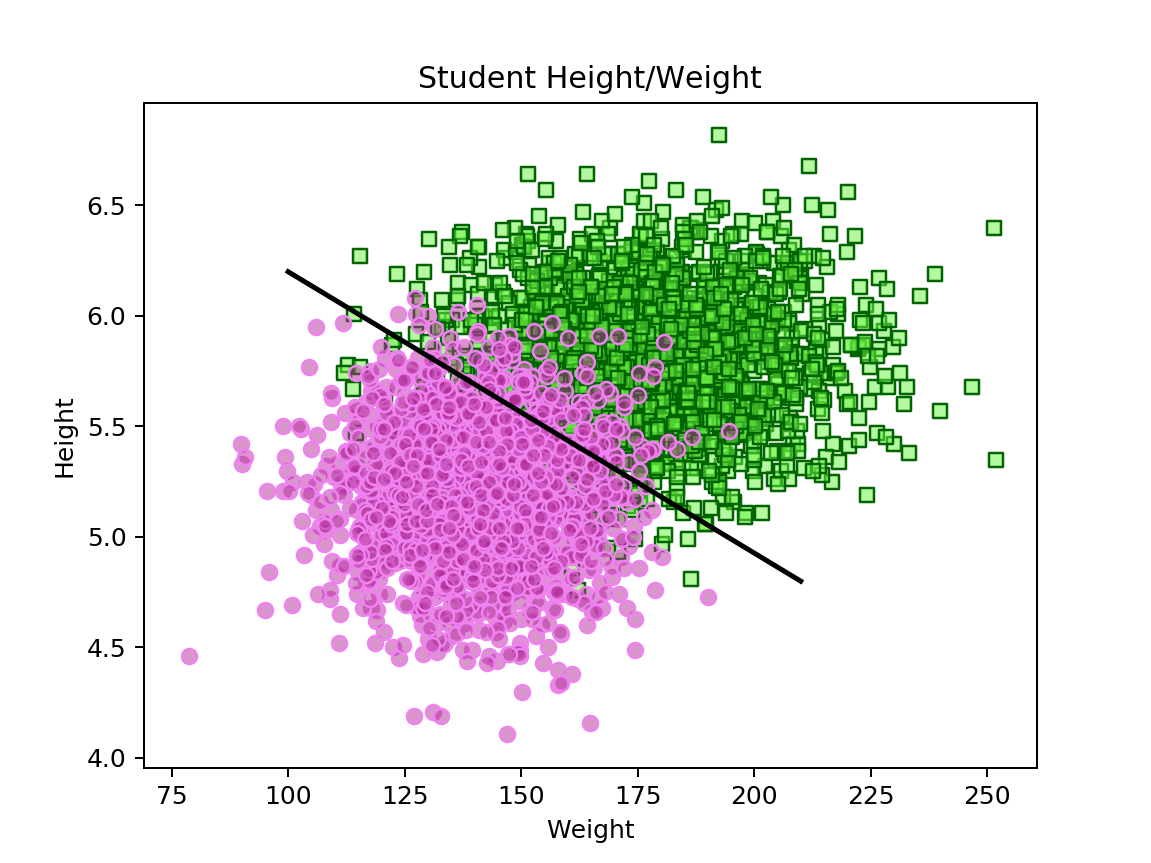

In [4]:
plot_height_weight_data(male_students, female_students,[210,100], [4.8,6.2])

### Decision Function Equation

The model that seems that it would fit best with the work based on what we have covered so far seems to be the same used in the calculation of Rosenblatt's Perceptron as it is a simple approach to developing a linear decision boundary.

- Here if we follow the basic formula to find a line in Euclidean space with Cartesian coordinates we will have a function with the following formula

$$ y=kx + y_0$$

- Where k is representative of the derivative dx/dy and may be calculated as

$$ k = \frac{y_2 - y_1}{x_2 - x_1} $$ 

- The aforementioned function can be solved for the $ net $ output of the equation as follows

$$ net = kx + y_0 - y $$

- Based on McCulloch-Pitts, we can resolve a potential output via the transfer function. Our model is a reverse implementation as females should produce a 1 and males a 0, however males are on the north side of the line. 

$$ out = \begin{cases} 0 & if\ net \ge 0\\ 1 & if\ net < 0 \end{cases}
$$




**For case a, where only height is considered:**

- Based on the presence of only one feature, the line is a linear one with no change on the y-axis, leaving $k = 0$ for all instances along the line. The sole feature used to calculate the $net$ will therefore be a points position relative to $y_0$, or the y-intercept. Here we will estimate $y_0 = 5.5$

$$ net = kx + y_0 - y = (0)x + 5.5 - y $$
$$ net = 5.5 - y $$
    
**For case b, where both height and weight are considered:**

- The slope for the decision boundary can be derived from two points which roughly split the groups. Here we'll set the first coordinates for
$p_1 = (100,6.3)$
, and the second point 
$p_2 = (220, 4.8)$.

$$ k = \frac{y_2 - y_1}{x_2 - x_1} = \frac{4.8 - 6.3}{220 - 100} = - \frac{1.5}{120} $$

- If 
$y_0$
is regarded as the y-intercept, and a valid estimate for
$y_0 = 6.25$
, this simplifies to the following:

$$ y = kx + y_0  = - \frac{1.5}{120}x + 6.25 $$

- We can manipulate this into a more workable form by solving for the $net$ 
of any point to determine where it will reside in relation to the line

$$
    net = - \frac{1.5}{120}x + 6.25 - y
$$



**3a.) Contrast the equation with the artificial counterpart of a biological neuron**

The artificial counterpart as we have approached it thus far has characteristics defined as follows:

- $net =\sum_{i=1}^{n} w_ix_i$ in the case of a bias equal to 0
- $net =\sum_{i=1}^{n} w_ix_i + w_{n+1}$ where bias is equal to $w_{n+1}$

$$out = \begin{cases} 1 & if\ net \ge 0\\
                  0 & if\ net < 0\end{cases}
    $$ 

In our case, our lines follow a similar measure, though as mentioned earlier, the transfer function is reversed as women are classified as a 1 and men are classified as a 0.

- $net =\sum_{i=1}^{1} w_1x_1 + w_{1+1}$ where one feature is used
- $net =\sum_{i=1}^{2} w_1x_1 + w_2x_2 + w_{n+1}$ where two features exist.

$$out = \begin{cases} 0 & if\ net \ge 0\\
                  1 & if\ net < 0\end{cases}
    $$ 

Here, since we are only operating on a single line and are not feeding forward through the transfer function multiple times, our weights do not change and the slope intercept acts as the bias in both cases. 

- In the case of one feature, our weight may be estimated as -1:

$$net = \sum_{i=1}^{n} w_1x_1  + w_{n+1} $$
$$net = \sum_{i=1}^{n} (-1)y + y_0 $$

- In the case of two features, our weights are the slope of the line and -1:

$$net = \sum_{i=1}^{n} w_1x_1 + w_2x_2 + w_{n+1} $$
$$net = \sum_{i=1}^{n} -\frac{1.5}{120}x + (-1)y + y_0 $$

If we were to follow more closely the nature of the artificial neuron, we would propagate the output value forward to the input of the next layer continuously until we reached a point where the accuracy might be deemed good enough to stop. Due to the overlapping nature of many of the values we would never reach perfect classfication using this type of model and will always have some element of error. Instead of a perfect classifier, we are limited to having a model that we might consider "good enough", that being a model with a sufficiently low error.


### Report the error, accuracy, true positive rate and true negative rate, also false positive and false negative rate

The measure of error is based on applying each point to the decision functions which are derived above, and determining the position of a point relative to the line. 

- If the point is above the line and belongs to a male student, the $net > 0$, resulting in an output of 0 which can be considered a true positive
- If the point is above the line and belongs to a female student, the $net > 0$ resulting in a 0 where it should actually be a 1, giving a false positive.
- If the point is below the line and belongs to a male student, $net < 0$, leading to a false negative
- If the point is below the line and belongs to a female student, $net < 0$, leading to a true negative

The accuracy of the classifier may be described as:

$$ ACC(M) = \frac{correctly\ classified\ patterns}{total\ set\ of\ patterns} $$


Here, with four classifications possible, we may reduce this to

$$ ACC(M) = \frac{true\ positives + true\ negatives}{true\ positives + 
true\ negatives + false\ positives + false\ negatives} $$


In turn the error may be calculated as
$$ 1 - ACC(M) $$


#### a.) Based on height

In [5]:
slope = 0
intercept = 5.51
measures = get_measures(male_students, female_students)

male correct, true positive : 296
male errors, false positive : 1688
female errors, false negative : 299
female correct, true negative : 1685
Accuracy : 0.8501
Error: 0.1499


#### b.) Based on Height and Weight

In [6]:
x1,x2 = 210, 100
y1,y2 = 4.8, 6.2
slope = (y2 - y1)/(x2 - x1)
intercept = y2 - (x2 * slope)
measures = get_measures(male_students, female_students, slope, intercept)


male correct, true positive : 157
male errors, false positive : 1843
female errors, false negative : 166
female correct, true negative : 1834
Accuracy : 0.9192
Error: 0.0808


### Citations

S. Russell, P. Norvig. *Artificial Intelligence: A Modern Approach*, Pearson, 2015